In [63]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [77]:
# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns

In [78]:
# reading the CSV file into pandas dataframe
mpg_df = pd.read_csv("C:\\Users\\Amit.Jain\\Desktop\PGP-DSBA\\Week_16_Linear_regression\\ThreeCars.csv")  

In [79]:
# Check top few records to get a feel of the data structure
mpg_df.head(50)

,Price,Age,Mileage,Porsche,Jaguar,BMW
0,69.4,3,21.50,1,0,0
1,56.9,3,43.00,1,0,0
2,49.9,2,19.90,1,0,0
3,47.4,4,36.00,1,0,0
4,42.9,4,44.00,1,0,0
5,36.9,6,49.80,1,0,0
6,83.0,0,1.30,1,0,0
7,72.9,0,0.67,1,0,0
8,69.9,2,13.40,1,0,0
9,67.9,0,9.70,1,0,0


In [71]:
# drop the car name column as it is useless for the model
mpg_df = mpg_df.drop('Price', axis=1)

In [72]:
mpg_df

,Age,Mileage,Porsche,Jaguar,BMW
0,3,21.5,1,0,0
1,3,43.0,1,0,0
2,2,19.9,1,0,0
3,4,36.0,1,0,0
4,4,44.0,1,0,0
...,...,...,...,...,...
85,6,68.1,0,0,1
86,6,46.8,0,0,1
87,5,46.8,0,0,1
88,4,36.1,0,0,1


In [73]:
#Lets analysze the distribution of the dependent (mpg) column
mpg_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,90.0,5.655556,3.895146,0.00,3.25,5.00,7.000,22.0
Mileage,90.0,41.321889,23.516371,0.67,20.75,42.85,59.825,100.7
Porsche,90.0,0.333333,0.474045,0.00,0.00,0.00,1.000,1.0
Jaguar,90.0,0.333333,0.474045,0.00,0.00,0.00,1.000,1.0
BMW,90.0,0.333333,0.474045,0.00,0.00,0.00,1.000,1.0


In [75]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      90 non-null     int64  
 1   Mileage  90 non-null     float64
 2   Porsche  90 non-null     int64  
 3   Jaguar   90 non-null     int64  
 4   BMW      90 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 3.6 KB


In [38]:
# ---------------------------------- Using Statsmodel library to get R type outputs -----------------------------

In [81]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'Price ~ Age+Mileage+Porsche+Jaguar+BMW', data = mpg_df).fit()
lm1.params

Intercept    45.748646
Age          -0.763526
Mileage      -0.462333
Porsche      25.644514
Jaguar        6.599498
BMW          13.504634
dtype: float64

In [82]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     75.59
Date:                Fri, 10 Jun 2022   Prob (F-statistic):           3.46e-27
Time:                        12:03:01   Log-Likelihood:                -317.27
No. Observations:                  90   AIC:                             644.5
Df Residuals:                      85   BIC:                             657.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.7486      1.432     31.955      0.0

In [43]:
# Let us check the sum of squared errors by predicting value of y for test cases and 
# subtracting from the actual y for the test cases

mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [44]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

3.0538103653849586

In [45]:
# so there is avg of 3.0 (roundoff) mpg difference from real mpg on an avg

In [46]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test, y_test)

0.8404952015294236

In [47]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test)

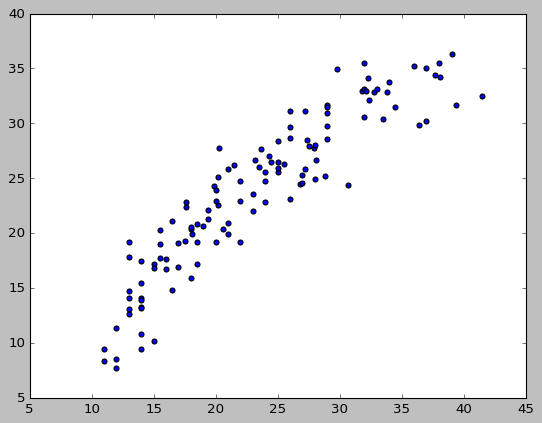

In [48]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
#plt.rcParams['figure.dpi'] = 500



plt.scatter(y_test['mpg'], y_pred)



In [49]:
# ------------------------------------------------- ITERATION 2  ---------------------------------------------------

In [50]:
# How do we improve the model? the R^2 is .844, how do we improve it
# The indpendent attributes have different units and scales of measurement 
# It is always a good practice to scale all the dimensions using z scores or someother methode to address the problem of different scales 


In [51]:
from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)


In [52]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [53]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is 0.3957470005920463
The coefficient for disp is 0.13057195254437304
The coefficient for hp is -0.18704682143280682
The coefficient for wt is -0.6881521871765557
The coefficient for acc is 0.004130471087879266
The coefficient for yr is 0.35562759880850797
The coefficient for car_type is 0.41977090750921286


In [54]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -2.852055326436472e-18


In [55]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test_scaled, y_test_scaled)

0.846057528866348

In [56]:
# Let us check the sum of squared errors by predicting value of y for training cases and 
# subtracting from the actual y for the training cases

mse = np.mean((regression_model.predict(X_test_scaled)-y_test_scaled)**2)

In [57]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

0.3923550319973632

In [58]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test_scaled)

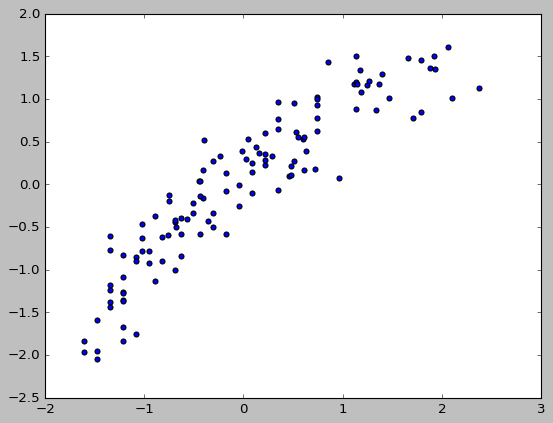

In [59]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
plt.scatter(y_test_scaled['mpg'], y_pred)

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [62]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1



cyl ---> 172.09167529137474
disp ---> 87.05808335183303
hp ---> 71.23983108333236
wt ---> 139.1665144189037
acc ---> 69.82068667385671
yr ---> 166.95012233353933
car_type ---> 12.993508077923245
